In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import OLS, add_constant

In [3]:
## Step 0: Getting Data
filename = "dfa_analysis_data.xlsx"
xls = pd.ExcelFile(filename)
sheet_names = xls.sheet_names
print(sheet_names)

# Read the Excel file (assuming 'Date' and 'MKT' columns exist)
dfs = pd.read_excel(filename, sheet_name='factors')


['descriptions', 'factors', 'portfolios (total returns)']


1. Calculate their univariate performance statistics:
- mean
- volatility
- Sharpe
- VaR(.05)  
Report these for the following three subsamples: Beginning - 1980, 1981 - 2001, 2002 - End

In [4]:
dfs['Date'] = pd.to_datetime(dfs['Date'])
dfs = dfs.sort_values('Date').reset_index(drop=True)


dfs= dfs[['Date', 'Mkt-RF', 'SMB','HML']]

#3. Create subsamples
sub1 = dfs[dfs['Date'].dt.year <= 1980]
sub2 = dfs[(dfs['Date'].dt.year >= 1981) & (dfs['Date'].dt.year <= 2001)]
sub3 = dfs[dfs['Date'].dt.year >= 2002]

#4. Define a helper function to compute statistics
def performance_stats(series):
    mean = series.mean()
    vol = series.std()
    sharpe = mean / vol
    var_05 = np.percentile(series, 5)
    return pd.Series({
        'Mean': mean,
        'Volatility': vol,
        'Sharpe': sharpe,
        'VaR(0.05)': var_05
    })

#5. show stats
factors = ["Mkt-RF", "SMB", "HML"]
results = {}
for factor in factors:
    results[factor] = pd.DataFrame({
        "Beginning–1980": performance_stats(sub1[factor]),
        "1981–2001": performance_stats(sub2[factor]),
        "2002–End": performance_stats(sub3[factor])
    })
    print(f"\nPerformance Statistics for {factor}")
    display(results[factor].round(4))





Performance Statistics for Mkt-RF


,Beginning–1980,1981–2001,2002–End
Mean,0.0067,0.0065,0.0076
Volatility,0.0592,0.0454,0.0443
Sharpe,0.1140,0.1430,0.1717
VaR(0.05),-0.0841,-0.0641,-0.0773



Performance Statistics for SMB


,Beginning–1980,1981–2001,2002–End
Mean,0.0028,-0.0002,0.0007
Volatility,0.0330,0.0339,0.0255
Sharpe,0.0857,-0.0050,0.0259
VaR(0.05),-0.0419,-0.0459,-0.0392



Performance Statistics for HML


,Beginning–1980,1981–2001,2002–End
Mean,0.0042,0.0054,0.0001
Volatility,0.0387,0.0317,0.0307
Sharpe,0.1082,0.1696,0.0033
VaR(0.05),-0.0442,-0.0416,-0.0415


2. Based on the factor statistics above, answer the following.
- Does each factor have a premium (positive expected excess return) in each subsample?  
No, all have positve expected returns except for SMB in 1981-2001.
- Does the premium to the size factor get smaller after 1980?  
Yes but then it gets bigger from 2002-End.
- Does the premium to the value factor get smaller during the 1990’s?  
No, it gets bigger and then gets smaller fromm 2002-End. 
- How have the factors performed since the time of the case, (2002-present)?
HML has performed worse, SMB has performed better, and Mkt-RF has all performed better.

3. The factors are constructed in such a way as to reduce correlation between them.
- Report the correlation matrix across the three factors.
- Does the construction method succeed in keeping correlations small?
Yes the correlations are all below 0.5
- Does it achieve this in each subsample?  
Yes the subsamples also have low correlations.

In [11]:

#correlation matrices
sub1 = dfs[dfs['Date'].dt.year <= 1980]
sub2 = dfs[(dfs['Date'].dt.year >= 1981) & (dfs['Date'].dt.year <= 2001)]
sub3 = dfs[dfs['Date'].dt.year >= 2002]
corr = dfs[["Mkt-RF","SMB","HML"]].corr()
corr_sub1 = sub1[["Mkt-RF","SMB","HML"]].corr()
corr_sub2 = sub2[["Mkt-RF","SMB","HML"]].corr()
corr_sub3 = sub3[["Mkt-RF","SMB","HML"]].corr()
print("\nCorrelation matrix:")
display(corr)
print("\nCorrelation matrix (Beginning–1980):")
display(corr_sub1)
print("\nCorrelation matrix (1981–2001):")
display(corr_sub2)
print("\nCorrelation matrix (2002–End):")
display(corr_sub3)


Correlation matrix:


,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.320443,0.227832
SMB,0.320443,1.000000,0.125828
HML,0.227832,0.125828,1.000000



Correlation matrix (Beginning–1980):


,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.374234,0.442341
SMB,0.374234,1.000000,0.313397
HML,0.442341,0.313397,1.000000



Correlation matrix (1981–2001):


,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.158652,-0.529912
SMB,0.158652,1.000000,-0.445451
HML,-0.529912,-0.445451,1.000000



Correlation matrix (2002–End):


,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.316034,0.109671
SMB,0.316034,1.000000,0.116227
HML,0.109671,0.116227,1.000000


4. Plot the cumulative returns of the three factors.
- Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

<Figure size 900x500 with 0 Axes>

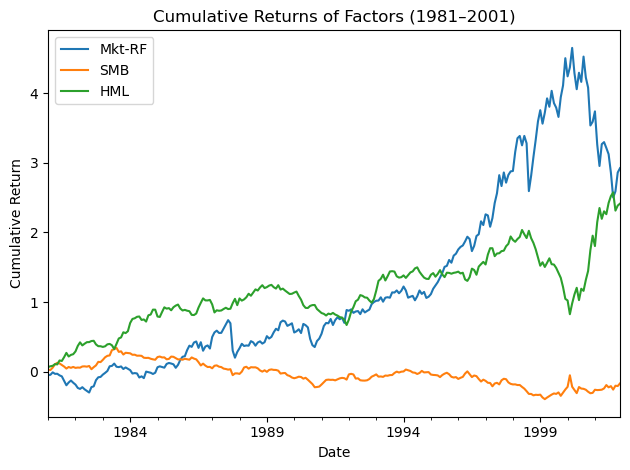

<Figure size 900x500 with 0 Axes>

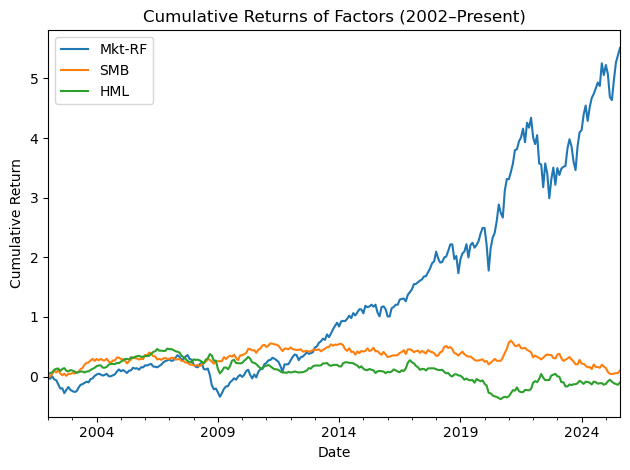

In [14]:
factor_cols = ["Mkt-RF", "SMB", "HML"]
def cumulative_returns(df_factors):
    """
    df_factors: DataFrame with columns ['Mkt-RF','SMB','HML'] containing decimal monthly returns (e.g., 0.01 = 1%)
    Returns DataFrame of cumulative return series = (1+r).cumprod() - 1
    """
    dfs = df_factors.copy().dropna()
    cum = (1 + dfs).cumprod() - 1
    return cum

# 1981–2001 cumulative returns
cum_81_01 = cumulative_returns(sub2[factor_cols].set_index(sub2['Date']))
plt.figure(figsize=(9, 5))
cum_81_01.plot()  # single chart, multiple lines; do not set styles/colors per your rules
plt.title("Cumulative Returns of Factors (1981–2001)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 2002–Present cumulative returns
cum_02_end = cumulative_returns(sub3[factor_cols].set_index(sub3['Date']))
plt.figure(figsize=(9, 5))
cum_02_end.plot()
plt.title("Cumulative Returns of Factors (2002–Present)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

5. Does it appear that all three factors were valuable in 1981-2001? And post-2001? Would you advise DFA to continue emphasizing all three factors?  
Mkt-RF has seen consistently higher returns while SMB and HML has stayed relatively stead. I would have them reallocate more to Mkt-RF.